# Alumnos
Ricardo Kaleb Flores Alfonso - A01198716

Raúl Correa Ocañas - A01722401

Iván Alejandro López Valenzuela - A01284875

Carol Jatiry Rendon Guerrero - A01425341

# Detecting SPAM emails with a Naive Bayes Classifier

The Naive Bayes Classifier is based on one of the most important results in Statistics: The Bayes Theorem. We will see how this theorem can be employed to determine if an email is SPAM or not.

First, we need to load some important libraries.

In [ ]:
## General Libraries
import pandas as pd
import numpy as np
import re

Now we need to load the data we will work with. This data can be downloaded from `https://www.kaggle.com/uciml/sms-spam-collection-dataset`.

In [ ]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Cleaning the data

Before going any further, it is clear that our data needs some cleaning. For instance, the **unnamed columns** can be removed. Speaking of columns, some "renaming" would be desirable for the sake of clarity. Also, we would like use a "binary variable" for categorizing the emails: 0 for **not spam** and 1 for **spam**.

In [ ]:
data_clean = data
data_clean['spam'] = data_clean['v1'].map({'ham' : 0, 'spam' : 1})
data_clean = data_clean.drop(columns=['v1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
data_clean = data_clean.rename(columns={'v2' : 'email'})
data_clean.head()

,email,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


It looks nicer, doesn't it? But this is just the beggining. At this point we need to process the emails and turn them into something that our model will "digest" much more easily. In order to do this we need some **Natural Language Processing** (NLP): "NLP is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data," according to Wikipedia.

## Text Processing

Text preprocessing is crucial before building a proper NLP model. Here are the important steps we are going to carry out:

1. Converting words to lower case.
2. Removing special characters.
3. Removing stopwords.
4. Stemming and lemmatization.

More on steps three and four later. For now let us proceed with step number one.

### Lower case and special characters

In [ ]:
data_clean['email'] = data_clean['email'].apply(lambda x : x.lower())
data_clean

,email,spam
0,"go until jurong point, crazy.. available only ...",0
1,ok lar... joking wif u oni...,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor... u c already then say...,0
4,"nah i don't think he goes to usf, he lives aro...",0
...,...,...
5567,this is the 2nd time we have tried 2 contact u...,1
5568,will ì_ b going to esplanade fr home?,0
5569,"pity, * was in mood for that. so...any other s...",0
5570,the guy did some bitching but i acted like i'd...,0


Let us do step number two:

In [ ]:
data_clean['email'] = data_clean['email'].apply(lambda x : re.sub('[^a-z0-9 ]+', ' ', x))
data_clean

,email,spam
0,go until jurong point crazy available only i...,0
1,ok lar joking wif u oni,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor u c already then say,0
4,nah i don t think he goes to usf he lives aro...,0
...,...,...
5567,this is the 2nd time we have tried 2 contact u...,1
5568,will b going to esplanade fr home,0
5569,pity was in mood for that so any other sug...,0
5570,the guy did some bitching but i acted like i d...,0


Notice that we have assumed that it is "safe" to turn the characters of the emails into lower case letters and that special characters do not posses relevant information. This may be okay for this type of application, but for, say, sentiment analysis, we might need to reconsider this since special characters like exclamation points are used to convey certain emotions.

### Stop words

At this point you migh be wondering "what are stop words?" Well, these are words that are encountered very frequently in a given language but do not carry useful information, thus it is a good practice to remove them. Before doing this, let us take a look into the stop words of the English language:

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Now onto removing stop words.

In [ ]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def remove_stop_words(message):

    words = word_tokenize(message)
    words = [word for word in words if word not in stop_words]

    return words

In [ ]:
data_clean['email'] = data_clean['email'].apply(remove_stop_words)
data_clean

,email,spam
0,"[go, jurong, point, crazy, available, bugis, n...",0
1,"[ok, lar, joking, wif, u, oni]",0
2,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",1
3,"[u, dun, say, early, hor, u, c, already, say]",0
4,"[nah, think, goes, usf, lives, around, though]",0
...,...,...
5567,"[2nd, time, tried, 2, contact, u, u, 750, poun...",1
5568,"[b, going, esplanade, fr, home]",0
5569,"[pity, mood, suggestions]",0
5570,"[guy, bitching, acted, like, interested, buyin...",0


Notice that apart from removing stop words we did something else, that "something else" is called **tokenization**: Tokenization is defined as splitting a text into small units known as **tokens**. We might think that this is as simple as taking a text and each time we find a space between words we split there, but the process is more involved than that. The method `word_tokenize` is clever enough to do thing such as this:

In [ ]:
word_tokenize("There's something I'd like to know, dude.")

['There', "'s", 'something', 'I', "'d", 'like', 'to', 'know', ',', 'dude', '.']

### Stemming and lemmatization

It is natural that in any language we will use variations of the same word, e.g., "run", "ran", and "running". These variations are called **inflections**. Even more, there are words that have similar meanings such as "democracy", "democratic", and "democratization". The goal of both stemming and lemmatization is to turn either inflections or derivationally related forms of a word into a common base form. For instance:

*Lemmatization:* am, are, is $\Rightarrow$ be.

*Stemming:* car, cars $\Rightarrow$ car.

Stemming is considered a crude heuristic process that chops off parts of a word by taking into account common prefixes and suffixes. On the other hand, lemmatization takes into consideration the grammar of the word and attemps to find the root word.

In [ ]:
## modules for
## stemming and lemmatization
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')

Porter = PorterStemmer()
Lemma = WordNetLemmatizer()

print(Porter.stem("car"))
print(Porter.stem("cars"))

print(Lemma.lemmatize("am", wordnet.VERB))
print(Lemma.lemmatize("are", wordnet.VERB))
print(Lemma.lemmatize("is", wordnet.VERB))

[nltk_data] Downloading package wordnet to /root/nltk_data...


car
car
be
be
be


In the meantime, for this application, we will stick to *stemming*.

In [ ]:
data_clean['email'] = data_clean['email'].apply(lambda x : [Porter.stem(word) for word in x])
data_clean

,email,spam
0,"[go, jurong, point, crazi, avail, bugi, n, gre...",0
1,"[ok, lar, joke, wif, u, oni]",0
2,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",1
3,"[u, dun, say, earli, hor, u, c, alreadi, say]",0
4,"[nah, think, goe, usf, live, around, though]",0
...,...,...
5567,"[2nd, time, tri, 2, contact, u, u, 750, pound,...",1
5568,"[b, go, esplanad, fr, home]",0
5569,"[piti, mood, suggest]",0
5570,"[guy, bitch, act, like, interest, buy, someth,...",0


## Training and testing sets

When we are developing a model we do not use all of our data for training, what we do is that we divide the data we posses into two sets: the training set and the testing set. A general rule of thumb is to use 80% of the data for training and 20% for testing our model. There are variations of this depending on the circumstances, but, in general, this is a good starting point. By the way, all the examples of our training data should be picked randomly to avoid any bias; it is not a good practice to pick these examples in a deterministic fashion.

In [ ]:
train_set = data_clean.sample(frac=0.8, random_state=1337)
test_set = data_clean.drop(train_set.index)
print(train_set.shape)
print(test_set.shape)

(4458, 2)
(1114, 2)


## Bayes' Theorem

You probably remember something called "conditional probability." Let us assume we have two events A and B that migh be related. Also, suppose that we know that event B has occured, then we might ask what is the probability that event A occurs given that event B already happened. This is written in mathematical terms as follows: $P(A|B)$. This quantity is equal to

$$
\begin{align}
P(A|B)=\frac{P(A\cap B)}{P(B)}
\end{align}
$$.

By the way, when events A and B are independent, we have that $P(A|B)=P(A)$; this means that the ocurrence of B does not influence whatsoever the probability of A. The latter implies that $P(A\cap B)=P(A)P(B)$.

On the other hand, we could also ask what is the probability that B occurs given that A happened:

$$
\begin{align}
P(B|A)=\frac{P(A\cap B)}{P(A)}.
\end{align}
$$

Then, we have that $P(A|B)P(B)=P(B|A)P(A)=P(A\cap B)$. Therefore,

$$
\begin{align}
P(A|B)=\frac{P(B|A)P(A)}{P(B)}.
\end{align}
$$

This last expression is known as **Bayes' Theorem**.

The term $P(A|B)$ is known as the *posterior probability*, the term $P(A)$ is defined as *a prior probability*, $P(B)$ is a *marginal probability*, and $P(B|A)$ is a conditional probability that can be understood as the likelihood of A given a fixed B: $L(A|B)=P(B|A)$.

Let us see Bayes' Theorem in action. Say there is a rare disease that just one out of a thousand people has it. Also, assume there is test for this disease that identifies correctly 99% of the time the people that have the disease. Then, if a person tests positive, what is the probability that this person has the disease?

Let us define two events: D is the event of a person having the disease, T is the event that a test gives a positive result. Then, to answer the question we just asked, we need to compute $P(D|T)$:

$$
\begin{align}
P(D|T)=\frac{P(T|D)P(D)}{P(T)}.
\end{align}
$$

To begin with, we have that $P(D)=0.001$ and $P(T|D)=0.99$. As for $P(T)$, this can be calculated as follows:

$$
\begin{align}
P(T)&=P(T|D)P(D)+P(T|\bar{D})P(\bar{D})\\
\\
&=(0.99)(0.001)+(0.01)(0.999)\\
\\
&=0.01098.
\end{align}
$$

Therefore,

$$
\begin{align}
P(D|T)=\frac{(0.99)(0.001)}{0.01098}=0.09016...
\end{align}
$$

It is worth to consider the following situation: So our hypothetical person realized that the probability of having the disease is not that high, so he/she goes to another lab and takes the test again. If the result is, once again, positive, what is the probability that the person has the disease?

In this case, our prior probability $P(D)$ is no longer 0.001 but 0.09016. Thus, we have to update both the posterior probability $P(D|T)$ and the marginal probability $P(T)$:

$$
\begin{align}
P(D|T)&=\frac{P(T|D)P(D)}{P(T)}\\
\\
&=\frac{P(T|D)P(D)}{P(T|D)P(D)+P(T|\bar{D})P(\bar{D})}\\
\\
&=\frac{(0.99)(0.0916)}{(0.99)(0.0916)+(0.01)(0.9098)}\\
\\
&=0.9075.
\end{align}
$$

As we can see, our hypothetical character should be worried now.

By the way, the latter example was taken from https://www.youtube.com/watch?v=R13BD8qKeTg.

## Naive Bayes Classifier

Let us talk about emails now. Let $W$ be the set of all English words and let an email $m$ be a set of words that belong to $W$: $m=\{w_1,w_2,\dots,w_n\}$. If we want to know what is the probability that said email $m$ is spam we can use, as expected, Bayes' Theorem:

$$
\begin{align}
P(spam|m)&=\frac{P(m|spam)P(spam)}{P(m)}\\
\\
&=\frac{P(w_1\cap w_2\cap\cdots\cap w_n|spam)P(spam)}{P(w_1\cap w_2\cap\cdots\cap w_n)}\\
\\
&=\frac{P(w_1\cap w_2\cap\cdots\cap w_n|spam)P(spam)}{P(w_1\cap w_2\cap\cdots\cap w_n|spam)P(spam)+P(w_1\cap w_2\cap\cdots\cap w_n|not~spam)P(not~spam)}.
\end{align}
$$

At this point it is a good idea to focus our attention on the numerator of the last expression. Notice that we have $P(w_1\cap w_2\cap\cdots\cap w_n|spam)P(spam)$, which is equivalent to the joint probability distribution of $P(w_1\cap w_2\cap\cdots\cap w_n\cap spam)$. By the multiplication rule, this expression can be rewritten as follows:

$$
\begin{align}
P(w_1\cap w_2\cap\cdots\cap w_n\cap spam) = P(spam)P(w_1|spam)P(w_2|w_1\cap spam)\cdots P(w_n|\cap_{i=1}^{n-1}w_i\cap spam).
\end{align}
$$

And here it comes the "naive assumption": given the spam category, we assume that all features of the model, in this case the words of the email, are **mutually and conditionally independent** on the spam category:

$$
\begin{align}
P(w_i|w_{1}\cap\cdots\cap w_{i-1}\cap spam) = P(w_i|spam).
\end{align}
$$

What this expression is telling us is that the probability of having word $w_i$ in a spam message is not affected by the presence of the set of words $\{w_{1},\dots,w_{i-1}\}$ in said message, what we just need to consider is that such email is spam. Consider the sentence "we need your info" and assume that we know we are dealing with an email that is spam. Then, if the naive assumption is true, this could happen:

$$
\begin{align}
P(\text{need}|\text{we}\cap\text{your}\cap\text{info}\cap spam) = P(\text{need}|spam).
\end{align}
$$

However, this is not usually true, what we have, in general, is this:

$$
\begin{align}
P(\text{need}|\text{we}\cap\text{your}\cap\text{info}\cap spam) \neq P(\text{need}|spam).
\end{align}
$$

For this reason we say that this assumption is naive. Nevertheless, in practice, this classifier works very well in many situations.

Let us go back to the numerator. Taking into account our naive premise, the joint probability distribution can be expressed as

$$
\begin{align}
P(w_1\cap w_2\cap\cdots\cap w_n\cap spam) = P(spam)P(w_1|spam)P(w_2|spam)\cdots P(w_n|spam).
\end{align}
$$

Therefore, the probability that a given message $m=\{w_1,w_2,\dots,w_n\}$ is spam can be computed with this expression:

$$
\begin{align}
P(spam|w_1\cap w_2\cap\cdots\cap w_n) = \frac{P(w_1|spam)P(w_2|spam)\cdots P(w_n|spam)P(spam)}{P(w_1\cap w_2\cap\cdots\cap w_n)}.
\end{align}
$$

You migh be asking, well, how can we classify an email as spam with all this? There are two options: the **Probabilistic Model** and the **Maximum A Posteriori Model (MAP)**.

#### Probabilistic Model

Given a threshold $p$, we classify an email as spam if this condition holds:

$$
\begin{align}
P(spam|w_1\cap w_2\cap\cdots\cap w_n) > p.
\end{align}
$$

#### Maximum A Posteriori Model (MAP)

An email is categorized as spam if

$$
\begin{align}
P(spam|w_1\cap w_2\cap\cdots\cap w_n) > P(not~spam|w_1\cap w_2\cap\cdots\cap w_n),
\end{align}
$$

which is equivalent to

$$
\begin{align}
P(w_1|spam)P(w_2|spam)\cdots P(w_n|spam)P(spam) > P(w_1|not~spam)P(w_2|not~spam)\cdots P(w_n|not~spam)P(not~spam).
\end{align}
$$

Notice that it is not necessary to calculate $P(w_1\cap w_2\cap\cdots\cap w_n)$. For classifying emails we will employ this method.


## Training the Model

Let $W_{\text{t}}$ be the set that contains all the words of the emails that belong to the training set. As expected, $W_{\text{t}}=W_{\text{t-~s}}~\cup W_{\text{t-s}}$ and $W_{\text{t-~s}}~\cap W_{\text{t-s}}=\emptyset$, where $W_{\text{t-~s}}~$ and $W_{\text{t-s}}~$ are the subsets of the training set that contain non-spam and spam emails, respectively. In the training phase we need to compute the following probabilities for the training set:

$$
\begin{align}
P(w_i|spam), & ~\forall w_i\in W_{\text{t-s}}\\
\\
P(w_i|not~spam), & ~\forall w_i\in W_{\text{t-~s}}.
\end{align}
$$

Notice that

$$
\begin{align}
P(w_i|spam)=\frac{\text{number of ocurrences of $w_i$ in spam emails}}{\text{total number of words of spam emails}}.
\end{align}
$$

Similarly,

$$
\begin{align}
P(w_i|not~spam)=\frac{\text{number of ocurrences of $w_i$ in non-spam emails}}{\text{total number of words of non-spam emails}}.
\end{align}
$$

Also, we need to calculate $P(spam)$ and $P(not~spam)$:

$$
\begin{align}
P(spam)&=\frac{|W_{\text{t-s}}~|}{|W_{\text{t}}|}\\
\\
P(not~spam)&=\frac{|W_{\text{t-~s}}~~|}{|W_{\text{t}}|}.
\end{align}
$$

By the way, this way of computing the probabilities is based on the **Bag of Words** model, in which we are interested in the frequencies of each of the words of a corpus without taking into consideration neither grammar  nor order.

This is not the only model at our disposal, another popular option is the **Term Frequency-Inverse Document Frequency (TF-IDF)** model, which is based on information theory. For now, we will focus on the bag-of-words approach, but if you want to know more this is a good starting point: https://en.wikipedia.org/wiki/Tf–idf.

In [ ]:
spam_dist = train_set[train_set['spam'] == 1].shape[0] / train_set.shape[0]
spam_dist

0.13526244952893673

In [ ]:
not_spam_dist = train_set[train_set['spam'] == 0].shape[0] / train_set.shape[0]
not_spam_dist

0.8647375504710633

In [ ]:
def bag_of_words(corpus):

    """
    This function receives a corpus, i.e., the set of processed emails, and
    returns a dictionary in which each item is a unique word and each word
    has its corresponding number of ocurrences in the corpus.
    """
    bag_of_words = {}

    set_of_words = set(corpus)
    for word in set_of_words:
        bag_of_words[word] = corpus.count(word)

    return bag_of_words

In [ ]:
def probability_words(df):

    """
    This function receives a dataframe of either spam emails or non-spam emails
    that has been processed as shown above. Using the dictionary that is returned
    by the previous function and the data contained in df, this function computes
    the probability of each word in bag_of_words. The probabilities are returned
    in probability_words.
    """

    probability_words = {}

    bag_of_words_dict = bag_of_words(df['email'].sum())
    total_words = sum(bag_of_words_dict.values())

    for word in bag_of_words_dict.keys():
        probability_words[word] = bag_of_words_dict[word] / total_words



    return probability_words

In [ ]:
probability_spam_words = probability_words(train_set[train_set['spam'] == 1])
probability_spam_words

{'simpl': 9.041591320072333e-05,
 'planettalkinst': 9.041591320072333e-05,
 'ultim': 9.041591320072333e-05,
 'mth': 0.0004520795660036166,
 'max10min': 0.0004520795660036166,
 'voda': 0.0004520795660036166,
 'rental': 0.0006329113924050633,
 'comput': 0.00027124773960217,
 'ghost': 9.041591320072333e-05,
 'valid': 0.0015370705244122965,
 'sic': 9.041591320072333e-05,
 '08715203028': 9.041591320072333e-05,
 'promo': 9.041591320072333e-05,
 'chap': 9.041591320072333e-05,
 '3hr': 0.00018083182640144665,
 'login': 0.0004520795660036166,
 '0721072': 9.041591320072333e-05,
 '25p': 0.0007233273056057866,
 'discount': 0.00054249547920434,
 'calls1': 9.041591320072333e-05,
 'exorcist': 9.041591320072333e-05,
 'pobox75ldns7': 9.041591320072333e-05,
 '08000930705': 0.00108499095840868,
 'com1win150ppmx3age16subscript': 9.041591320072333e-05,
 '09061701939': 9.041591320072333e-05,
 'bbdelux': 9.041591320072333e-05,
 'barkley': 9.041591320072333e-05,
 'meal': 9.041591320072333e-05,
 '0578': 0.00018

In [23]:
probability_non_spam_words = probability_words(train_set[train_set['spam'] == 0])
probability_non_spam_words

{'cttergg': 3.182179793158313e-05,
 'jade': 3.182179793158313e-05,
 'vewi': 6.364359586316626e-05,
 'dresser': 9.546539379474941e-05,
 'porteg': 3.182179793158313e-05,
 'weirdo': 3.182179793158313e-05,
 'kote': 3.182179793158313e-05,
 'jerk': 3.182179793158313e-05,
 'ritten': 3.182179793158313e-05,
 'chest': 6.364359586316626e-05,
 'forgotten': 6.364359586316626e-05,
 'slipper': 3.182179793158313e-05,
 'red': 0.00012728719172633253,
 'japanes': 6.364359586316626e-05,
 'tot': 0.0005727923627684964,
 'stool': 3.182179793158313e-05,
 'steer': 3.182179793158313e-05,
 'jst': 6.364359586316626e-05,
 'jstfrnd': 9.546539379474941e-05,
 'msn': 3.182179793158313e-05,
 'arul': 3.182179793158313e-05,
 'incid': 9.546539379474941e-05,
 'bedroom': 0.00019093078758949882,
 'karaok': 6.364359586316626e-05,
 'cuz': 0.00012728719172633253,
 'tonight': 0.0015592680986475736,
 'nang': 3.182179793158313e-05,
 'minecraft': 3.182179793158313e-05,
 'olayiwola': 3.182179793158313e-05,
 'rout': 3.182179793158313

In [24]:
def classify_email(email):

    """
    This function is the equivalent of the predict method in scikit-learn.
    In this case it receives a list in which each element is a processed
    word of said message, and returns a 1 if such email is spam, or 0 otherwise.
    For this purpose, this function needs the probabilities that were computed
    by the function probability_words.
    """

    p_spam_email = 1
    p_non_spam_email = 1

    for word in email:
        if word in probability_spam_words.keys():
            p_spam_email *= probability_spam_words[word]
        if word in probability_non_spam_words.keys():
            p_non_spam_email *= probability_non_spam_words[word]

    p_spam_email *= spam_dist
    p_non_spam_email *= not_spam_dist

    return int(p_spam_email < p_non_spam_email)

In [25]:
train_set_hat = train_set.copy()
train_set_hat['prediction'] = train_set['email'].apply(classify_email)
train_set_hat

,email,spam,prediction
4090,"[hey, doc, pl, want, get, nice, shirt, hubbi, ...",0,0
2418,"[madam, regret, disturb, might, receiv, refer,...",0,0
1666,"[guess, spent, last, night, phase, fourth, dim...",0,0
1773,"[come, whatev, want]",0,0
2134,"[start, search, get, job, day, great, potenti,...",0,0
...,...,...,...
1425,"[mu, like, lt, gt, second]",0,0
1894,"[freemsg, hey, u, got, 1, video, pic, fone, re...",1,1
3578,"[multipli, number, independ, count, decim, poi...",0,0
3582,"[sent, maga, money, yesterday, oh]",0,0


In [26]:
test_set_hat = test_set.copy()
test_set_hat['prediction'] = test_set['email'].apply(classify_email)
test_set_hat[test_set_hat['spam'] != test_set_hat['prediction']]

,email,spam,prediction
77,"[like, peopl, much, shi, pa]",0,1
86,"[real, u, get, yo, need, 2, ticket, one, jacke...",0,1
162,"[love, excit, day, spend, make, happi]",0,1
196,"[u, got, person, stori]",0,1
233,"[ye, tv, alway, avail, work, place]",0,1
...,...,...,...
5484,"[pick, variou, point, go, 2, yeovil, motor, pr...",0,1
5486,"[ofcours, also, upload, song]",0,1
5488,"[k, sent]",0,1
5490,"[k, sent]",0,1


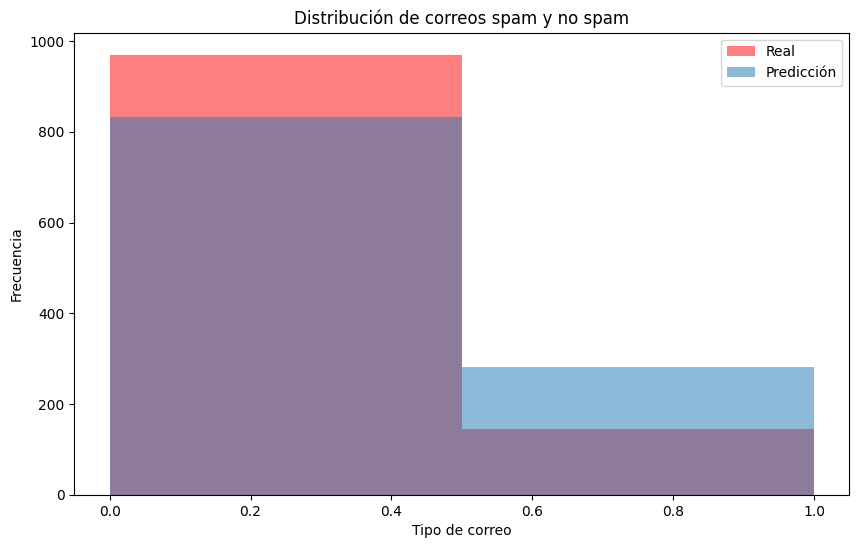

In [27]:
#Graficar cuantos correos son spam y cuantos no
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(test_set_hat['spam'], bins=2, alpha=0.5, label='Real', color='red')
plt.hist(test_set_hat['prediction'], bins=2, alpha=0.5, label='Predicción')
plt.title('Distribución de correos spam y no spam')
plt.xlabel('Tipo de correo')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()


## Evaluating the model

So we have built the Naive Bayes Classifier and we have trained it, but is it good? To know how good our model is we need **evaluation metrics**. There are tons of metrics, and the ideal metric, or metrics, will have to be chosen depending on what is important for your particular application. For now, we will mention a few of the most common, however, before going any further, we need to say a few things about the **confusion matrix**.

#### Confusion Matrix

A confusion matrix is a table that allows us to visualize the performance of a classification algorithm.

<img src="confusion.png" alt="Drawing" style="width: 700px;"/>

This type of table receives this name because it lets us observe whether an algorithm is mislabeling two classes (Image taken from https://en.wikipedia.org/wiki/Precision_and_recall).

#### Accuracy

Accuracy is defined as follows:

$$
\text{Accuracy}=\frac{\text{true positives} + \text{true negatives}}{\text{true positives} + \text{false positives} +  \text{true negatives} + \text{false negatives}}.
$$

This metric is useful when both classes are equally important and when we have balanced set, which is not quite the case in this application.

#### Precision

The ratio of positive cases that were correctly labeled over all the examples that were classified as positive is called **precision**:

$$
\text{Precision}=\frac{\text{true positives}}{\text{true positives} + \text{false positives}}.
$$

When we are interested in reducing the amount of false positives and we have imbalanced sets, precision is a good choice as an evaluation metric. In fact, for this application, this metric is appriopriate since we are interested in detecting spam emails: spam is the positive category, if a regular email is classified as spam (false positive), we are sending emails that are important for us to the spam folder; however, if a spam email is labeled as not-spam, said email will end up in our inbox, which is not as serious as not reading an email that we are expecting. Also, keep in mind that our sets are imbalanced: the majority of our emails in the data are not spam.

#### Recall

Recall is the ratio of the examples that were correclty identified as a positive case over all the true positives examples in our data. This metric can be understood as the sensitivity of our model:

$$
\text{Recall}=\frac{\text{true positives}}{\text{true positives} + \text{false negatives}}.
$$

If we want to pay special attention to the false negatives that our model is detecting, and if our sets are imbalanced, then this can be one of our performance metrics. Say we want to build a model that detects a dangerous disease. In this case, we are not interested in telling a person that he/she does not have the disease when that is not the case (false negative).

#### F1 Score

The F1 score is equal to the harmonic mean of precision and recall. It is useful when we want to have a balance between precision and recall and when we do not have balanced sets (large number of actual negatives). It is defined as

$$
\text{F1 Score}=2\frac{\text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}}.
$$

In [28]:
def performance_metrics(results):

    positives = results[['spam', 'prediction']][results['spam'] == 1]
    negatives = results[['spam', 'prediction']][results['spam'] == 0]

    true_negatives = negatives[negatives['spam'] == negatives['prediction']].shape[0]
    false_positives = negatives[negatives['spam'] != negatives['prediction']].shape[0]
    true_positives = positives[positives['spam'] == positives['prediction']].shape[0]
    false_negatives = positives[positives['spam'] != positives['prediction']].shape[0]

    confusion_matrix = {'actual positives' : [true_positives, false_negatives],
                        'actual negatives' : [false_positives, true_negatives]}

    confusion_matrix_df = pd.DataFrame.from_dict(confusion_matrix, orient='index',
                                                 columns=['predicted positives', 'predicted negatives'])

    accuracy = (true_positives + true_negatives) / (true_positives + false_positives +  true_negatives + false_negatives)
    precission = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precission * recall) / (precission + recall)

    metrics = {'Accuracy' : accuracy, 'Precision' : precission, 'Recall' : recall, 'F1 Score' : f1_score}

    metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Metrics'])

    return confusion_matrix_df, metrics_df

In [29]:
confusion_matrix, metrics = performance_metrics(test_set_hat)
confusion_matrix, metrics

(                  predicted positives  predicted negatives
 actual positives                  108                   36
 actual negatives                  173                  797,
             Metrics
 Accuracy   0.812388
 Precision  0.384342
 Recall     0.750000
 F1 Score   0.508235)

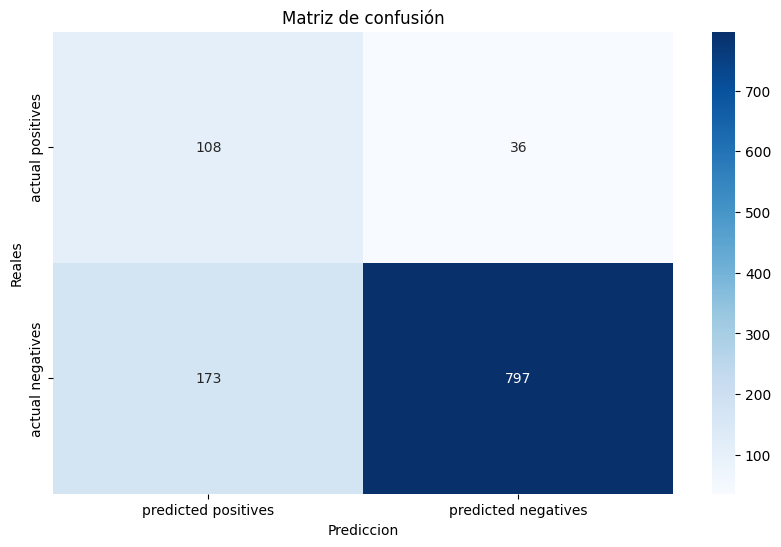

In [30]:
#Confusion matrix
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediccion')
plt.ylabel('Reales')
plt.title('Matriz de confusión')
plt.show()


As we can see, our model has good precision, but its recall is poor: a lot of emails that are spam were labeled as not-spam. Although this is not a serious issue for this type of application, this suggests that we should get more examples of spam emails if we want to increase the sensitivity of our model or try different strategies such as n-grams, TF-IDF, etc., or both things.

## Generating new messages

It turns out that we can use the conditional distributions that we learned in the training phase to generate either spam or not spam messages. For creating an spam email we can employ this distribution:

$$P(w|\text{spam})$$.

Notice that said distribution is stored in `probability_spam_words`.

In the next cell, use the `np.random.choice` function and the `join` method for creating an spam message.



In [31]:
# Generate a spam email with a length of 20 words

generator = np.random.default_rng()

spam_email = generator.choice(list(probability_spam_words.keys()), size=20, replace=True, p=list(probability_spam_words.values()))

# print as a string
print(' '.join(spam_email))

repli minmoremobsemspobox45po139wa mobil 1000 prize repli 09050000878 sw73ss number call sexi today import get cs 5we join know repres 250


In [32]:
# Generate a non spam email composed of 20 random words

real_email = generator.choice(list(probability_non_spam_words.keys()), size=20, replace=True, p=list(probability_non_spam_words.values()))
print(' '.join(real_email))

cutefrnd later traffic love home push though near phone cool write th think lifetim asthma forgot amount dunno outag use


The messages that you got should not make much sense since the we followed the "naive" approach and stemmed words. Nevertheless, what you get should give you an idea of the type of words you can find in these two types of emails.